### MeCabを使った形態素解析

In [1]:
! sed 's/\r$//g' data/neko.txt | mecab > data/neko.txt.mecab

In [2]:
! head data/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。


### 30. 形態素解析結果の読み込み

In [3]:
def line_to_dict(line):
    if line == 'EOS' or line == '':
        return None
    lst = line.split('\t')
    pos = lst[1].split(',')
    dct = {
        'surface' : lst[0],
        'pos' : pos[0],
        'pos1' : pos[1],
        'base' : pos[6]}
    return dct

def mecab_to_list(f):
    lst = []
    tmp = []
    for line in f:
        line = line.rstrip('\n')
        dct = line_to_dict(line)
        if dct is not None:
            tmp.append(dct)
        elif tmp:
            lst.append(tmp)
            tmp = []
    return lst

In [4]:
with open('data/neko.txt.mecab') as f:
    neko = mecab_to_list(f)

In [5]:
neko[:3]

[[{'surface': '一', 'pos': '名詞', 'pos1': '数', 'base': '一'}],
 [{'surface': '\u3000', 'pos': '記号', 'pos1': '空白', 'base': '\u3000'},
  {'surface': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'base': '吾輩'},
  {'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'},
  {'surface': '猫', 'pos': '名詞', 'pos1': '一般', 'base': '猫'},
  {'surface': 'で', 'pos': '助動詞', 'pos1': '*', 'base': 'だ'},
  {'surface': 'ある', 'pos': '助動詞', 'pos1': '*', 'base': 'ある'},
  {'surface': '。', 'pos': '記号', 'pos1': '句点', 'base': '。'}],
 [{'surface': '名前', 'pos': '名詞', 'pos1': '一般', 'base': '名前'},
  {'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'},
  {'surface': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'base': 'まだ'},
  {'surface': '無い', 'pos': '形容詞', 'pos1': '自立', 'base': '無い'},
  {'surface': '。', 'pos': '記号', 'pos1': '句点', 'base': '。'}]]

### 31. 動詞

In [6]:
surfaces_of_verb = {
    dct['surface']
    for sent in neko
    for dct in sent
    if dct['pos'] == '動詞'}

for verb in list(surfaces_of_verb)[:10]:
    print(verb)
print('合計:', len(surfaces_of_verb))

好む
分かる
なれん
つくっ
溜っ
寝転ぶ
ふわ
動じ
曇っ
なりすまし
合計: 3893


### 32. 動詞の原形

In [7]:
bases_of_verb = {
    dct['base']
    for sent in neko
    for dct in sent
    if dct['pos'] == '動詞'}

for verb in list(bases_of_verb)[:10]:
    print(verb)
print('合計:', len(bases_of_verb))

好む
分かる
引き裂く
助かる
取り乱す
聞き合せる
寝転ぶ
作り上げる
飛出る
明け放す
合計: 2300


### 33. 「AのB」

In [8]:
def tri_grams(sent):
    return zip(sent, sent[1:], sent[2:])
    
def is_A_no_B(x, y, z):
    return (x['pos'] == z['pos'] == '名詞') and (y['base'] == 'の')

A_no_Bs = {
    ''.join([x['surface'] for x in tri_gram])
    for sent in neko 
    for tri_gram in tri_grams(sent)
    if is_A_no_B(*tri_gram)}

for phrase in list(A_no_Bs)[:10]:
    print(phrase)
print('合計:', len(A_no_Bs))

這裏の消息
小犬の喧嘩
サンドラ・ベロニの講釈
君のところ
迷亭の帽子
子の鼻
君の苦
事蹟の三
呑のよう
イスキラスのそれ
合計: 4924


### 34. 名詞の連接

In [9]:
def longest_nouns(sent):
    lst = []
    tmp = []
    for dct in sent:
        if dct['pos'] == '名詞':
            tmp.append(dct['surface'])
        else:
            if len(tmp) > 1:
                lst.append(tmp)
            tmp = []
    return lst

noun_chunks = [
    ''.join(nouns)
    for sent in neko
    for nouns in longest_nouns(sent)]

for chunk in noun_chunks[:10]:
    print(chunk)
print('合計:', len(noun_chunks))

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
合計: 7335


### 35. 単語の出現頻度

In [10]:
from collections import Counter

In [11]:
surfaces = [
    dct['surface']
    for sent in neko
    for dct in sent]
dist = Counter(surfaces).most_common()

for word, freq in dist[:10]:
    print(word, freq)   

の 9194
。 7486
て 6868
、 6772
は 6420
に 6243
を 6071
と 5508
が 5337
た 3988


### 36. 頻度上位10語

In [12]:
# ! pip install matplotlib japanize_matplotlib

In [13]:
import matplotlib.pyplot as plt
import japanize_matplotlib

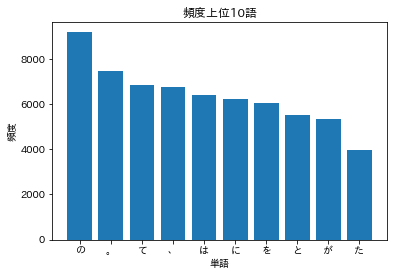

In [14]:
words = [word for word, _ in dist[:10]]
freqs = [freq for _, freq in dist[:10]]
plt.bar(words, freqs)
plt.title('頻度上位10語')
plt.xlabel('単語')
plt.ylabel('頻度')
plt.savefig('result/36.png')

### 37. 「猫」と共起頻度の高い上位10語

"共起"する単語は同じ文に現れる単語とする

In [15]:
counter = Counter()
for sent in neko:
    if any(dct['base'] == '猫' for dct in sent):
        for dct in sent:
            word = dct['base']
            if word != '猫':
                counter[word] += 1

dist = counter.most_common(10)

for word, freq in dist:
    print(word, freq)

の 391
は 272
、 252
に 250
を 232
だ 231
て 229
。 209
と 202
が 180


正直助詞ばかりでつまらないので，品詞を制限してみる

In [16]:
counter = Counter()
for sent in neko:
    if any(dct['base'] == '猫' for dct in sent):
        for dct in sent:
            word = dct['base']
            if word != '猫' and dct['pos'] in {'名詞', '動詞', '形容詞', '副詞'}:
                counter[word] += 1
                
dist = counter.most_common(10)

for word, freq in dist:
    print(word, freq)

する 144
* 63
事 59
吾輩 58
いる 58
ある 55
の 55
人間 40
ない 39
云う 38


せっかくなので，猫と人間が共起する文をいくつかみてみる

In [17]:
for sent in neko[:1000]:
    if any(dct['base'] == '猫' for dct in sent) and any(dct['base'] == '人間' for dct in sent):
        lst = [dct['surface'] for dct in sent]
        print(''.join(lst))

白君は涙を流してその一部始終を話した上、どうしても我等猫族が親子の愛を完くして美しい家族的生活をするには人間と戦ってこれを剿滅せねばならぬといわれた。
しかし人間というものは到底吾輩猫属の言語を解し得るくらいに天の恵に浴しておらん動物であるから、残念ながらそのままにしておいた。
　ちょっと読者に断っておきたいが、元来人間が何ぞというと猫々と、事もなげに軽侮の口調をもって吾輩を評価する癖があるははなはだよくない。
人間の糟から牛と馬が出来て、牛と馬の糞から猫が製造されたごとく考えるのは、自分の無智に心付かんで高慢な顔をする教師などにはありがちの事でもあろうが、はたから見てあまり見っともいい者じゃない。
よそ目には一列一体、平等無差別、どの猫も自家固有の特色などはないようであるが、猫の社会に這入って見るとなかなか複雑なもので十人十色という人間界の語はそのままここにも応用が出来るのである。
こんなところを見ると、人間は利己主義から割り出した公平という念は猫より優っているかも知れぬが、智慧はかえって猫より劣っているようだ。
主人のように裏表のある人間は日記でも書いて世間に出されない自己の面目を暗室内に発揮する必要があるかも知れないが、我等猫属に至ると行住坐臥、行屎送尿ことごとく真正の日記であるから、別段そんな面倒な手数をして、己れの真面目を保存するには及ばぬと思う。


### 38. ヒストグラム

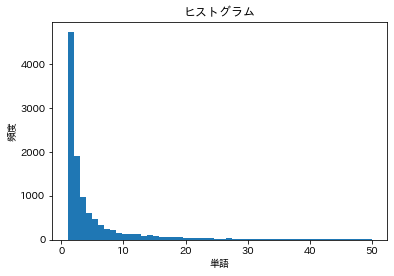

In [18]:
words = [
    dct['base']
    for sent in neko
    for dct in sent]
cnt = Counter(words).most_common()

dist = [freq for _, freq in cnt]

plt.title('ヒストグラム')
plt.xlabel('単語')
plt.ylabel('頻度')
plt.hist(dist, bins=50, range=(1,50))
plt.savefig('result/38.png')

### 39. Zipfの法則

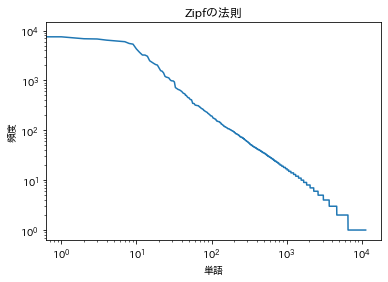

In [19]:
plt.title('Zipfの法則')
plt.xlabel('単語')
plt.ylabel('頻度')
plt.xscale('log')
plt.yscale('log')
plt.plot(range(len(dist)), dist)
plt.savefig('result/39.png')